<a href="https://colab.research.google.com/github/sufam0322/p-center/blob/master/pcenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

!pip install docplex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docplex.mp.model import Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
N=63
np.random.seed(1)
X=[206260,206998,206807,206863,207599,208216,208457,208489,208945,209386,209231,209887,210691,209819,209840,209542,206685,206724,207523,207597,208883,208852,209181,209216,209502,209136,209179,209784,209761,209528,209433,209998,209951,210216,210230,209762,210331,210535,210859,211248,211329,211860,210546,210713,211018,211269,211235,211155,211488,211557,211581,211611,212326,212773,212868,212973,213487,209644,207829,208565,209929,210643,207093]
Y=[545664,545771,546335,546336,545772,545802,546587,546604,545994,546184,546565,546450,548163,547265,547267,545843,544960,544931,544674,544640,544871,544788,544976,544921,545133,543890,543895,544083,544120,543986,543993,544426,544399,541184,544018,544752,545378,544535,545056,545800,544763,544362,543711,543303,542578,541846,541194,543600,543783,544041,543194,543222,544042,543795,543963,544256,543730,543345,545015,544841,545599,546032,545318]
demand=list(np.random.randint(low=10, high=50,size=N))

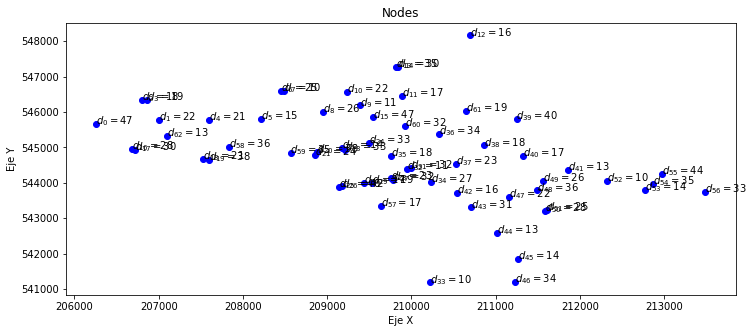

In [26]:
plt.figure(figsize=(12,5))
plt. scatter(X,Y,color='blue')

for i in range(len(X)):
  plt.annotate('$d_{%d}=%d$' %(i,demand[i]),(X[i]-0.5,Y[i]-5))


plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Nodes")
plt.show()

In [27]:
nodes=[i for i in range(N)]
facility = {i for i in nodes}
arcs={(i,j) for i in nodes for j in facility}

p=5

distance={(i,j):np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nodes for j in facility}

demand_total=sum(demand)
w={i:demand[i]/demand_total for i in nodes}

In [28]:
mdl=Model('Pcenter')

In [29]:
x=mdl.binary_var_dict(arcs,name='x')
y=mdl.binary_var_dict(facility,name='y')
z=mdl.continuous_var(name='z')


In [30]:
mdl.minimize(z)

mdl.add_constraints(mdl.sum(distance[i,j]*x[i,j]*w[i] for i in nodes) <=z for j in facility)
mdl.add_constraints(mdl.sum(x[i,j]for j in facility)==1 for i in nodes)
mdl.add_constraint(mdl.sum(y[j] for j in facility)<=p)

M=len(facility)
mdl.add_constraints(mdl.sum(x[i,j] for i in nodes)-M*y[j] <=0 for j in facility)

solution=mdl.solve(log_output=True)

CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.


DOcplexLimitsExceeded: ignored